# 1. Introduction 

Recently I managed to finally get my driving license. Now comes the time that I will be getting my own car soon. But I am definitely not a car person. I have no clue about how the market is. Only thing I know is that it has been on NOS news that in the past 2 years the average car price in the Netherlands has gone up by 28%. (NOS Nieuws, 2022) 

>With this project my aim is to investigate more on what influences the price of a car and create a predictive model using numerical and categorical variables. The price of a car in euros will be my dependent variable. 


I will be using and cleaning a dataset I webscraped from Autoscout. Using the following link:

https://www.autoscout24.nl/lst?sort=standard&desc=0&ustate=N%2CU&atype=C&cy=NL&search_id=15gb7hvjo9k&page=1

I used the webscraper.io chrome extension for this. 


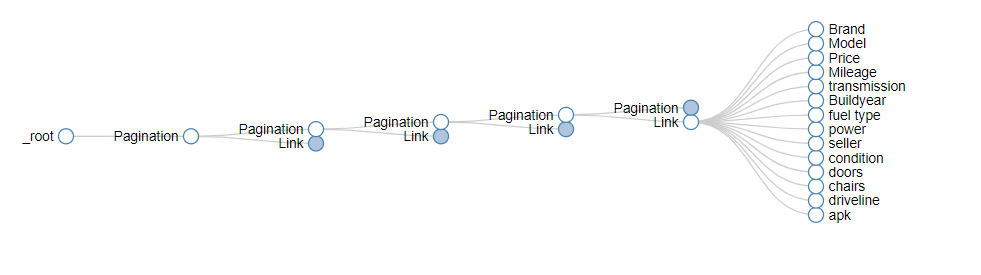

The image above shows the selector graph used for this. I looped the pagination to click on the next button and select each listing on each page (20). 

# 2. Dataset

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [2]:
df = pd.read_csv('autoscout.csv')
df = df.dropna()
df.head()

,web-scraper-order,web-scraper-start-url,Pagination,Link,Link-href,Brand,Model,Price,Mileage,transmission,Buildyear,fuel type,power,seller,condition,doors,chairs,driveline,apk
1,1654880835-535,https://www.autoscout24.nl/lst?sort=standard&d...,https://www.autoscout24.nl/lst?sort=standard&d...,Audi A6 Avant 4.0 TFSI RS 6 quattro - originee...,https://www.autoscout24.nl/aanbod/audi-a6-avan...,Audi,A6,"€ 81.330,-",90.717 km,Automatisch,01/2015,Benzine,518 kW (704 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,Nieuw
3,1654880259-483,https://www.autoscout24.nl/lst?sort=standard&d...,https://www.autoscout24.nl/lst?sort=standard&d...,"Porsche Panamera 3.0Elektrische achterklep, Pa...",https://www.autoscout24.nl/aanbod/porsche-pana...,Porsche,Panamera,"€ 86.750,-",50.012 km,Automatisch,07/2017,Benzine,243 kW (330 PK),Autobedrijf,Gebruikt,5.0,4.0,Achter,Nieuw
6,1654877729-251,https://www.autoscout24.nl/lst?sort=standard&d...,https://www.autoscout24.nl/lst?sort=standard&d...,Mercedes-Benz CLS 63 AMG S 4MATIC Designo - Ex...,https://www.autoscout24.nl/aanbod/mercedes-ben...,Mercedes-Benz,CLS 63 AMG,"€ 69.950,-",89.998 km,Automatisch,07/2015,Benzine,430 kW (585 PK),Autobedrijf,Gebruikt,4.0,5.0,4x4,Nieuw
9,1654878341-307,https://www.autoscout24.nl/lst?sort=standard&d...,https://www.autoscout24.nl/lst?sort=standard&d...,Mercedes-Benz A 45 AMG 4MATIC A45 2016 | Deale...,https://www.autoscout24.nl/aanbod/mercedes-ben...,Mercedes-Benz,A 45 AMG,"€ 34.999,-",97.563 km,Automatisch,01/2016,Benzine,280 kW (381 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,01/2024
10,1654877947-271,https://www.autoscout24.nl/lst?sort=standard&d...,https://www.autoscout24.nl/lst?sort=standard&d...,Porsche 992 3.0 Carrera | Sport Design | Sport...,https://www.autoscout24.nl/aanbod/porsche-992-...,Porsche,992,"€ 154.950,-",13.650 km,Automatisch,03/2020,Benzine,283 kW (385 PK),Autobedrijf,Gebruikt,2.0,4.0,Achter,03/2024


In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 1 to 398
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      246 non-null    object 
 1   web-scraper-start-url  246 non-null    object 
 2   Pagination             246 non-null    object 
 3   Link                   246 non-null    object 
 4   Link-href              246 non-null    object 
 5   Brand                  246 non-null    object 
 6   Model                  246 non-null    object 
 7   Price                  246 non-null    object 
 8   Mileage                246 non-null    object 
 9   transmission           246 non-null    object 
 10  Buildyear              246 non-null    object 
 11  fuel type              246 non-null    object 
 12  power                  246 non-null    object 
 13  seller                 246 non-null    object 
 14  condition              246 non-null    object 
 15  doors 

In [4]:
df2 = df[['Price','Brand', 'Model', 'Mileage', 'transmission', 'Buildyear','fuel type', 'power', 'seller', 'condition', 'doors', 'chairs', 'driveline', 'apk']]
df2.head()
#Here I select the info I want to use

,Price,Brand,Model,Mileage,transmission,Buildyear,fuel type,power,seller,condition,doors,chairs,driveline,apk
1,"€ 81.330,-",Audi,A6,90.717 km,Automatisch,01/2015,Benzine,518 kW (704 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,Nieuw
3,"€ 86.750,-",Porsche,Panamera,50.012 km,Automatisch,07/2017,Benzine,243 kW (330 PK),Autobedrijf,Gebruikt,5.0,4.0,Achter,Nieuw
6,"€ 69.950,-",Mercedes-Benz,CLS 63 AMG,89.998 km,Automatisch,07/2015,Benzine,430 kW (585 PK),Autobedrijf,Gebruikt,4.0,5.0,4x4,Nieuw
9,"€ 34.999,-",Mercedes-Benz,A 45 AMG,97.563 km,Automatisch,01/2016,Benzine,280 kW (381 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,01/2024
10,"€ 154.950,-",Porsche,992,13.650 km,Automatisch,03/2020,Benzine,283 kW (385 PK),Autobedrijf,Gebruikt,2.0,4.0,Achter,03/2024


First I clean up the price

In [5]:
df2['Price'] = df2['Price'].str.replace('.', '', regex = True ) 
df2['Price'] = df2['Price'].str.replace(',', '.')
df2['Price'] = df2['Price'].str.replace('€', '')
df2['Price'] = df2['Price'].str.replace('-', '')


C:\Users\monzi\AppData\Local\Temp/ipykernel_18428/833049841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price'] = df2['Price'].str.replace('.', '', regex = True )
C:\Users\monzi\AppData\Local\Temp/ipykernel_18428/833049841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price'] = df2['Price'].str.replace(',', '.')
C:\Users\monzi\AppData\Local\Temp/ipykernel_18428/833049841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Then I cleaned up the mileage

In [6]:
df2['Mileage'] = df2['Mileage'].str.replace('.', '', regex = True ) 
df2['Mileage'] = df2['Mileage'].str.replace('km', '', regex = True ) 
df2.head()

C:\Users\monzi\AppData\Local\Temp/ipykernel_18428/679692894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mileage'] = df2['Mileage'].str.replace('.', '', regex = True )
C:\Users\monzi\AppData\Local\Temp/ipykernel_18428/679692894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mileage'] = df2['Mileage'].str.replace('km', '', regex = True )


,Price,Brand,Model,Mileage,transmission,Buildyear,fuel type,power,seller,condition,doors,chairs,driveline,apk
1,81330.,Audi,A6,90717,Automatisch,01/2015,Benzine,518 kW (704 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,Nieuw
3,86750.,Porsche,Panamera,50012,Automatisch,07/2017,Benzine,243 kW (330 PK),Autobedrijf,Gebruikt,5.0,4.0,Achter,Nieuw
6,69950.,Mercedes-Benz,CLS 63 AMG,89998,Automatisch,07/2015,Benzine,430 kW (585 PK),Autobedrijf,Gebruikt,4.0,5.0,4x4,Nieuw
9,34999.,Mercedes-Benz,A 45 AMG,97563,Automatisch,01/2016,Benzine,280 kW (381 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,01/2024
10,154950.,Porsche,992,13650,Automatisch,03/2020,Benzine,283 kW (385 PK),Autobedrijf,Gebruikt,2.0,4.0,Achter,03/2024


I split the build year from the month 

In [7]:
df_build = df2['Buildyear'].str.split(pat = '/', expand = True)

In [8]:
df2[['buildmonth', 'buildyears']] = df_build #and added it back to df
df2.head()

C:\Users\monzi\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Price,Brand,Model,Mileage,transmission,Buildyear,fuel type,power,seller,condition,doors,chairs,driveline,apk,buildmonth,buildyears
1,81330.,Audi,A6,90717,Automatisch,01/2015,Benzine,518 kW (704 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,Nieuw,01,2015
3,86750.,Porsche,Panamera,50012,Automatisch,07/2017,Benzine,243 kW (330 PK),Autobedrijf,Gebruikt,5.0,4.0,Achter,Nieuw,07,2017
6,69950.,Mercedes-Benz,CLS 63 AMG,89998,Automatisch,07/2015,Benzine,430 kW (585 PK),Autobedrijf,Gebruikt,4.0,5.0,4x4,Nieuw,07,2015
9,34999.,Mercedes-Benz,A 45 AMG,97563,Automatisch,01/2016,Benzine,280 kW (381 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,01/2024,01,2016
10,154950.,Porsche,992,13650,Automatisch,03/2020,Benzine,283 kW (385 PK),Autobedrijf,Gebruikt,2.0,4.0,Achter,03/2024,03,2020


In [9]:
df2.drop('Buildyear', inplace=True, axis=1)
df2.head()

C:\Users\monzi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Price,Brand,Model,Mileage,transmission,fuel type,power,seller,condition,doors,chairs,driveline,apk,buildmonth,buildyears
1,81330.,Audi,A6,90717,Automatisch,Benzine,518 kW (704 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,Nieuw,01,2015
3,86750.,Porsche,Panamera,50012,Automatisch,Benzine,243 kW (330 PK),Autobedrijf,Gebruikt,5.0,4.0,Achter,Nieuw,07,2017
6,69950.,Mercedes-Benz,CLS 63 AMG,89998,Automatisch,Benzine,430 kW (585 PK),Autobedrijf,Gebruikt,4.0,5.0,4x4,Nieuw,07,2015
9,34999.,Mercedes-Benz,A 45 AMG,97563,Automatisch,Benzine,280 kW (381 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,01/2024,01,2016
10,154950.,Porsche,992,13650,Automatisch,Benzine,283 kW (385 PK),Autobedrijf,Gebruikt,2.0,4.0,Achter,03/2024,03,2020


I did the same with power to only get kW

In [10]:
df_power = df2['power'].str.split(pat = '(', expand = True)
df2[['kW', 'PK']] = df_power #and added it back to df
df2.head()

C:\Users\monzi\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Price,Brand,Model,Mileage,transmission,fuel type,power,seller,condition,doors,chairs,driveline,apk,buildmonth,buildyears,kW,PK
1,81330.,Audi,A6,90717,Automatisch,Benzine,518 kW (704 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,Nieuw,01,2015,518 kW,704 PK)
3,86750.,Porsche,Panamera,50012,Automatisch,Benzine,243 kW (330 PK),Autobedrijf,Gebruikt,5.0,4.0,Achter,Nieuw,07,2017,243 kW,330 PK)
6,69950.,Mercedes-Benz,CLS 63 AMG,89998,Automatisch,Benzine,430 kW (585 PK),Autobedrijf,Gebruikt,4.0,5.0,4x4,Nieuw,07,2015,430 kW,585 PK)
9,34999.,Mercedes-Benz,A 45 AMG,97563,Automatisch,Benzine,280 kW (381 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,01/2024,01,2016,280 kW,381 PK)
10,154950.,Porsche,992,13650,Automatisch,Benzine,283 kW (385 PK),Autobedrijf,Gebruikt,2.0,4.0,Achter,03/2024,03,2020,283 kW,385 PK)


In [11]:
df2['kW'] = df2['kW'].str.replace('kW', '', regex = True ) 
df2['PK'] = df2['PK'].str.replace('PK', '', regex = True ) 
df2['PK'] = df2['PK'].str.replace(')', '', regex = True ) 
df2.head()

C:\Users\monzi\AppData\Local\Temp/ipykernel_18428/2624071916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['kW'] = df2['kW'].str.replace('kW', '', regex = True )
C:\Users\monzi\AppData\Local\Temp/ipykernel_18428/2624071916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PK'] = df2['PK'].str.replace('PK', '', regex = True )
C:\Users\monzi\AppData\Local\Temp/ipykernel_18428/2624071916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,Price,Brand,Model,Mileage,transmission,fuel type,power,seller,condition,doors,chairs,driveline,apk,buildmonth,buildyears,kW,PK
1,81330.,Audi,A6,90717,Automatisch,Benzine,518 kW (704 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,Nieuw,01,2015,518,704
3,86750.,Porsche,Panamera,50012,Automatisch,Benzine,243 kW (330 PK),Autobedrijf,Gebruikt,5.0,4.0,Achter,Nieuw,07,2017,243,330
6,69950.,Mercedes-Benz,CLS 63 AMG,89998,Automatisch,Benzine,430 kW (585 PK),Autobedrijf,Gebruikt,4.0,5.0,4x4,Nieuw,07,2015,430,585
9,34999.,Mercedes-Benz,A 45 AMG,97563,Automatisch,Benzine,280 kW (381 PK),Autobedrijf,Gebruikt,5.0,5.0,4x4,01/2024,01,2016,280,381
10,154950.,Porsche,992,13650,Automatisch,Benzine,283 kW (385 PK),Autobedrijf,Gebruikt,2.0,4.0,Achter,03/2024,03,2020,283,385


In [12]:
df2.drop('power', inplace=True, axis=1)
df2 = df2.dropna()
df2.head()

C:\Users\monzi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Price,Brand,Model,Mileage,transmission,fuel type,seller,condition,doors,chairs,driveline,apk,buildmonth,buildyears,kW,PK
1,81330.,Audi,A6,90717,Automatisch,Benzine,Autobedrijf,Gebruikt,5.0,5.0,4x4,Nieuw,01,2015,518,704
3,86750.,Porsche,Panamera,50012,Automatisch,Benzine,Autobedrijf,Gebruikt,5.0,4.0,Achter,Nieuw,07,2017,243,330
6,69950.,Mercedes-Benz,CLS 63 AMG,89998,Automatisch,Benzine,Autobedrijf,Gebruikt,4.0,5.0,4x4,Nieuw,07,2015,430,585
9,34999.,Mercedes-Benz,A 45 AMG,97563,Automatisch,Benzine,Autobedrijf,Gebruikt,5.0,5.0,4x4,01/2024,01,2016,280,381
10,154950.,Porsche,992,13650,Automatisch,Benzine,Autobedrijf,Gebruikt,2.0,4.0,Achter,03/2024,03,2020,283,385


Changed the types to float

In [13]:
df2['Price'] = df2['Price'].astype(float)
df2['Mileage'] = df2['Mileage'].astype(float)
df2['buildmonth'] = df2['buildmonth'].astype(float)
df2['buildyears'] = df2['buildyears'].astype(float)
df2['kW'] = df2['kW'].astype(float)
df2['PK'] = df2['PK'].astype(float)

In [14]:
 df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 1 to 398
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         231 non-null    float64
 1   Brand         231 non-null    object 
 2   Model         231 non-null    object 
 3   Mileage       231 non-null    float64
 4   transmission  231 non-null    object 
 5   fuel type     231 non-null    object 
 6   seller        231 non-null    object 
 7   condition     231 non-null    object 
 8   doors         231 non-null    float64
 9   chairs        231 non-null    float64
 10  driveline     231 non-null    object 
 11  apk           231 non-null    object 
 12  buildmonth    231 non-null    float64
 13  buildyears    231 non-null    float64
 14  kW            231 non-null    float64
 15  PK            231 non-null    float64
dtypes: float64(8), object(8)
memory usage: 30.7+ KB


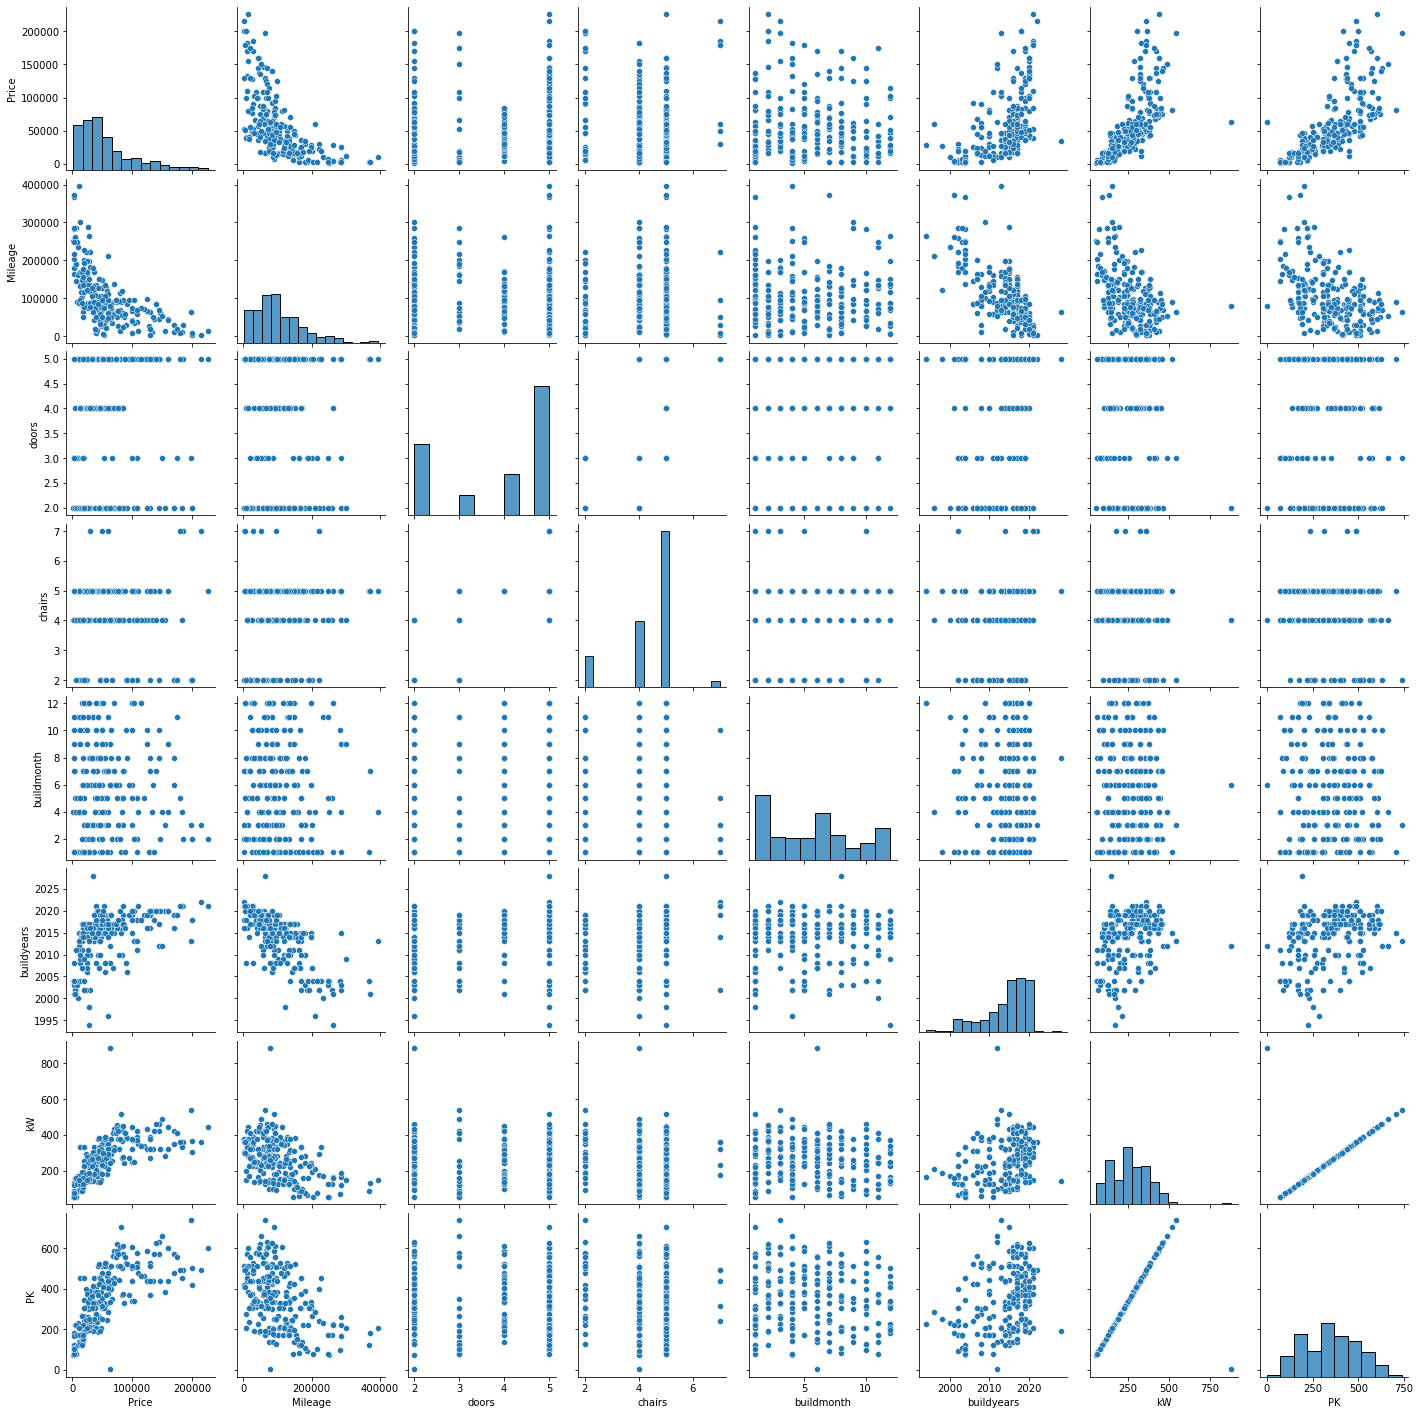

In [15]:
sns.pairplot(df2)
plt.show()

# 3. Feature engineering

I decided to make dummie variables to use different categories to help predict the price. 

In [16]:
df2['fuel type'].value_counts()

Benzine            186
Diesel              22
Elektro/Benzine     15
Elektrisch           7
Elektro/Diesel       1
Name: fuel type, dtype: int64

In [17]:
dummies = pd.get_dummies(df2['fuel type'])
df2= pd.concat([df2, dummies],axis =1)
df2.head()

,Price,Brand,Model,Mileage,transmission,fuel type,seller,condition,doors,chairs,...,apk,buildmonth,buildyears,kW,PK,Benzine,Diesel,Elektrisch,Elektro/Benzine,Elektro/Diesel
1,81330.0,Audi,A6,90717.0,Automatisch,Benzine,Autobedrijf,Gebruikt,5.0,5.0,...,Nieuw,1.0,2015.0,518.0,704.0,1,0,0,0,0
3,86750.0,Porsche,Panamera,50012.0,Automatisch,Benzine,Autobedrijf,Gebruikt,5.0,4.0,...,Nieuw,7.0,2017.0,243.0,330.0,1,0,0,0,0
6,69950.0,Mercedes-Benz,CLS 63 AMG,89998.0,Automatisch,Benzine,Autobedrijf,Gebruikt,4.0,5.0,...,Nieuw,7.0,2015.0,430.0,585.0,1,0,0,0,0
9,34999.0,Mercedes-Benz,A 45 AMG,97563.0,Automatisch,Benzine,Autobedrijf,Gebruikt,5.0,5.0,...,01/2024,1.0,2016.0,280.0,381.0,1,0,0,0,0
10,154950.0,Porsche,992,13650.0,Automatisch,Benzine,Autobedrijf,Gebruikt,2.0,4.0,...,03/2024,3.0,2020.0,283.0,385.0,1,0,0,0,0


In [18]:
df2['transmission'].value_counts()

Automatisch           187
Handgeschakeld         42
-                       1
Half/Semi-automaat      1
Name: transmission, dtype: int64

In [19]:
dummies2 = pd.get_dummies(df2['transmission'])
df2= pd.concat([df2, dummies2],axis =1)
df2.head()

,Price,Brand,Model,Mileage,transmission,fuel type,seller,condition,doors,chairs,...,PK,Benzine,Diesel,Elektrisch,Elektro/Benzine,Elektro/Diesel,-,Automatisch,Half/Semi-automaat,Handgeschakeld
1,81330.0,Audi,A6,90717.0,Automatisch,Benzine,Autobedrijf,Gebruikt,5.0,5.0,...,704.0,1,0,0,0,0,0,1,0,0
3,86750.0,Porsche,Panamera,50012.0,Automatisch,Benzine,Autobedrijf,Gebruikt,5.0,4.0,...,330.0,1,0,0,0,0,0,1,0,0
6,69950.0,Mercedes-Benz,CLS 63 AMG,89998.0,Automatisch,Benzine,Autobedrijf,Gebruikt,4.0,5.0,...,585.0,1,0,0,0,0,0,1,0,0
9,34999.0,Mercedes-Benz,A 45 AMG,97563.0,Automatisch,Benzine,Autobedrijf,Gebruikt,5.0,5.0,...,381.0,1,0,0,0,0,0,1,0,0
10,154950.0,Porsche,992,13650.0,Automatisch,Benzine,Autobedrijf,Gebruikt,2.0,4.0,...,385.0,1,0,0,0,0,0,1,0,0


# 4.Exploratory data analysis

First I explore the variable: Price

In [20]:
df2['Price'].describe()

count       231.00000
mean      57317.20000
std       47656.47863
min        1299.00000
25%       23922.50000
50%       44950.00000
75%       75947.50000
max      225999.10000
Name: Price, dtype: float64

C:\Users\monzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


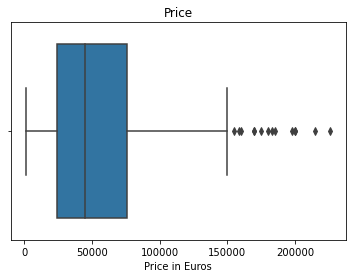

In [21]:
sns.boxplot(df2['Price'])
plt.title('Price')
plt.xlabel('Price in Euros')
plt.show()

I use the knowledge of these outliers to remove them for the next graph

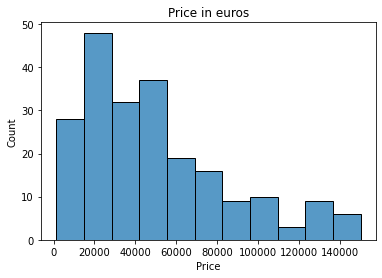

In [22]:
df2['Price'] = df2['Price'].apply(pd.to_numeric, errors='coerce')
def above_150000(x):
    if(x > 150000): #with this I removed the outliers
        return float('NaN')
    else: 
        return x
df2['Price'] = df2['Price'].apply(above_150000)

df2['Price'].name = 'Price' #Labeling the variable for plotting
age = df2['Price'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.histplot(age, kde=False) 

plt.title('Price in euros')
plt.show() 

Most cars are around the 25000 euro range

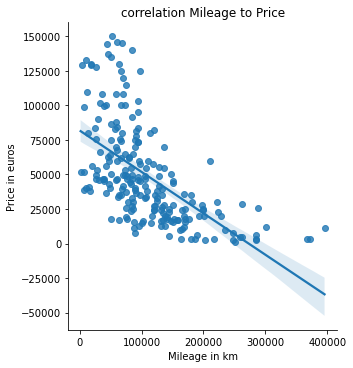

In [23]:
sns.lmplot(x='Mileage', y='Price', data=df2) 
plt.xlabel('Mileage in km') 
plt.ylabel('Price in euros')
plt.title('correlation Mileage to Price')
plt.show()

There is a negative linear relation between mileage and price in euros

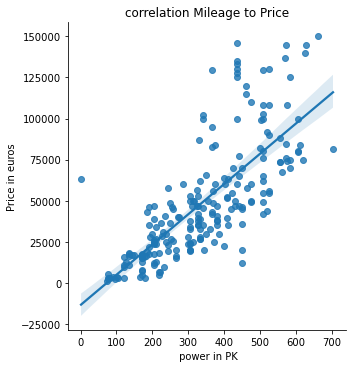

In [24]:
sns.lmplot(x='PK', y='Price', data=df2) 
plt.xlabel(' power in PK') 
plt.ylabel('Price in euros')
plt.title('correlation Mileage to Price')
plt.show()

There is a positive linear relation between PK and price

# 5. Predictive model

In [25]:
corr = df2.corr() #check to see the numbers
corr

,Price,Mileage,doors,chairs,buildmonth,buildyears,kW,PK,Benzine,Diesel,Elektrisch,Elektro/Benzine,Elektro/Diesel,-,Automatisch,Half/Semi-automaat,Handgeschakeld
Price,1.000000,-0.597143,0.062523,-0.106150,0.005939,0.478974,0.721607,0.753181,0.092236,-0.113480,0.076256,-0.073593,0.020532,-0.017598,0.386520,0.080538,-0.404815
Mileage,-0.597143,1.000000,-0.039809,0.052032,-0.060833,-0.694644,-0.462224,-0.476125,-0.069924,0.267103,-0.203001,-0.054205,-0.038958,-0.085875,-0.373265,-0.018163,0.397732
doors,0.062523,-0.039809,1.000000,0.701999,0.135087,0.370699,-0.073709,-0.027333,-0.313950,0.159310,0.155707,0.191027,0.058079,0.006676,0.260283,-0.096131,-0.249768
chairs,-0.106150,0.052032,0.701999,1.000000,0.102982,0.264910,-0.134565,-0.128095,-0.221409,0.145427,0.094365,0.107597,0.035198,0.035198,0.218415,-0.151004,-0.202657
buildmonth,0.005939,-0.060833,0.135087,0.102982,1.000000,0.057058,-0.040813,-0.046006,-0.169267,-0.000604,0.182283,0.119222,0.100392,0.024791,0.070423,0.043692,-0.083355
buildyears,0.478974,-0.694644,0.370699,0.264910,0.057058,1.000000,0.306103,0.335541,-0.220161,0.068965,0.186867,0.135568,0.023032,-0.070308,0.525021,-0.093643,-0.506618
kW,0.721607,-0.462224,-0.073709,-0.134565,-0.040813,0.306103,1.000000,0.870348,0.222038,-0.198903,0.049007,-0.155997,0.007418,-0.035137,0.351261,0.068129,-0.363236
PK,0.753181,-0.476125,-0.027333,-0.128095,-0.046006,0.335541,0.870348,1.000000,0.217330,-0.198805,0.057949,-0.155498,0.010157,-0.034795,0.442518,0.074059,-0.457212
Benzine,0.092236,-0.069924,-0.313950,-0.221409,-0.169267,-0.220161,0.222038,0.217330,1.000000,-0.659612,-0.359398,-0.535758,-0.134056,0.032433,-0.071578,0.032433,0.061832
Diesel,-0.113480,0.267103,0.159310,0.145427,-0.000604,0.068965,-0.198903,-0.198805,-0.659612,1.000000,-0.057354,-0.085498,-0.021393,-0.021393,-0.067959,-0.021393,0.076472


In [26]:
for col in df2.columns:
    print(col)


Price
Brand
Model
Mileage
transmission
fuel type
seller
condition
doors
chairs
driveline
apk
buildmonth
buildyears
kW
PK
Benzine
Diesel
Elektrisch
Elektro/Benzine
Elektro/Diesel
-
Automatisch
Half/Semi-automaat
Handgeschakeld


In [27]:
from sklearn.preprocessing import normalize

df2 = df2.dropna() #first get rid of rows with empty cells
X = df2[['Mileage','doors', 'chairs', 'buildyears', 'kW', 'PK', 'Automatisch', 'Benzine', 'Diesel', 'Elektrisch', 'Elektro/Benzine', 'Elektro/Diesel', '-', 'Half/Semi-automaat', 'Handgeschakeld']] 
y = df2['Price'] 




In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4) #split the data, store it into different variables
X_train.head()


,Mileage,doors,chairs,buildyears,kW,PK,Automatisch,Benzine,Diesel,Elektrisch,Elektro/Benzine,Elektro/Diesel,-,Half/Semi-automaat,Handgeschakeld
174,83796.0,5.0,5.0,2014.0,245.0,333.0,1,1,0,0,0,0,0,0,0
396,39610.0,3.0,2.0,2015.0,375.0,510.0,1,1,0,0,0,0,0,0,0
204,287287.0,5.0,5.0,2015.0,190.0,258.0,1,0,1,0,0,0,0,0,0
84,68253.0,5.0,5.0,2017.0,299.0,407.0,1,0,0,0,1,0,0,0,0
234,36529.0,3.0,2.0,2018.0,423.0,575.0,1,1,0,0,0,0,0,0,0


In [29]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model


First I look into the R^2. I will use this to see which percentage of the variation can be explained by the predictive model I build above.  

In [30]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.6574086644658934

In [31]:
import math
math.sqrt(mean_squared_error(y_test, y_test_p))

21343.72836933878

Root mean squared error is used to see by how much the prediction is typically off.In this case it is off by more than 21343 euros. While there seemed to be a clear linear relation between multiple variables and the price. This model Can't be used to correctly predict it. Especially since we established in previous charts that most cars were in the 25000 euro range. The errors seem too big to be reliable. 

C:\Users\monzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


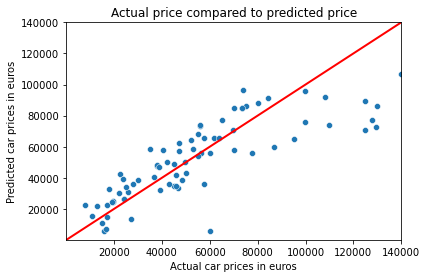

In [32]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual car prices in euros')
plt.ylabel('Predicted car prices in euros')
plt.title('Actual price compared to predicted price')
plt.xlim([100, 140000])
plt.ylim([100, 140000])
plt.plot([100, 140000], [100, 140000], color = 'red', lw = 2)
plt.show()


Although the root mean square error, with more than 21343 euros, seems high and the R^2 with only 65 % of the variation in price explained seems low. We can still see that the actual price follows the predicted price to a certain degree. Mostly the biggest variations are visible in the higher range (90000 euros or higher). It seems that the predicted car prices undervalues the cars by a substantial amount. I think this has mostly to do with the fact that I don't take rarity of the cars into account. Specially if a car is an oldtimer, the model will just think it's an old car with high mileage and therefore value it less, while in fact it might be a beloved collectors item. 

References

NOS Nieuws. (2022, 4 7). nos.nl. Opgehaald van Tweedehandsauto fors duurder: 'Lijkt wel de woningmarkt, gekkenhuis': https://nos.nl/artikel/2424256-tweedehandsauto-fors-duurder-lijkt-wel-de-woningmarkt-gekkenhuis

